# Titanic Dataset Kaggle
## Description
https://www.kaggle.com/c/titanic
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


## Workflow stages

The competition solution workflow goes through seven stages described in the Data Science Solutions book.

    1. Question or problem definition.
    2. Acquire training and testing data.
    3. Wrangle, prepare, cleanse the data.
    4. Analyze, identify patterns, and explore the data.
    5. Model, predict and solve the problem.
    6. Visualize, report, and present the problem solving steps and final solution.
    7. Supply or submit the results.
    
## Workflow Goals

The data science solutions workflow solves for seven major goals.

1. **Classifying**. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

2. **Correlating**. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

3. **Converting**. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

4. **Completing**. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

5. **Correcting**. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

6. **Creating**. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

7. **Charting**. How to select the right visualization plots and charts depending on nature of the data and the solution goals.


## 1. Question (Problem Definition)

Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

# Let's load the data, describe what we have, etc....
1. load data (headers, column names, parse dates, etc...)
2. describe dataframe (head, describe, info, NaNs, type, ....)
3. ??

In [30]:
# load modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline 

#load data 
df_train = pd.read_csv('train.csv')

# methods to see df and get some info
print ('Shape: \n', df_train.shape,'\n')
print ('The Dataframe... \n', df_train.head(), '\n ________________________________\n')
print ('The columns types... \n', df_train.dtypes, '\n ________________________________\n')
print ('Some statistics: \n', df_train.describe(), '\n ________________________________\n')
print ('Where are the null values: ',df_train.isnull().any(), '\n ________________________________\n')


Shape: 
 (891, 12) 

The Dataframe... 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

There are 11 features, we can try to know how many different values have each of the features..(binary, categorical, conitnuous)

In [31]:
print ('Values of Survived: ', df_train.Survived.unique(), '\n ________________________________\n')
print ('Values of PClass: ', df_train.Pclass.unique(), '\n ________________________________\n')
print ('Values of Age: ', sorted(df_train.Age.unique()), '\n ________________________________\n')
print ('Values of Sex: ', df_train.Sex.unique(), '\n ________________________________\n')
print ('Values of SibSp: ', sorted(df_train.SibSp.unique()), '\n ________________________________\n')
print ('Values of Parch: ', df_train.Parch.unique(), '\n ________________________________\n')
#print ('Values of Ticket: ', df_train.Ticket.unique())
print ('Values of Fare: ', sorted(df_train.Fare.unique()), '\n ________________________________\n')
print ('Values of Cabin: ', df_train.Cabin.unique(), '\n ________________________________\n')
print ('Values of Embarked: ', df_train.Embarked.unique(), '\n ________________________________\n')

Values of Survived:  [0 1] 
 ________________________________

Values of PClass:  [3 1 2] 
 ________________________________

Values of Age:  [0.83, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 11.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 38.0, nan, 0.42, 0.67, 0.75, 0.92, 1.0, 6.0, 9.0, 10.0, 12.0, 13.0, 14.5, 20.5, 23.5, 24.5, 30.5, 32.5, 34.5, 36.0, 36.5, 37.0, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5, 71.0, 74.0, 80.0] 
 ________________________________

Values of Sex:  ['male' 'female'] 
 ________________________________

Values of SibSp:  [0, 1, 2, 3, 4, 5, 8] 
 ________________________________

Values of Parch:  [0 1 2 5 3 4 6] 
 ________________________________

Values of Fare:  [0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.4958, 6.75, 6.8583, 6

## what we have?
1. 12 columns: PassengerId + 11 features
    1. **Survived**: int64, [0-1] (binary), no Null values, the mean indicates the % of survival (in the df_train is 38%). Comparing this with the survival rate of the entire data ( 1-1502/2224 = 0.32) indicates that **train_df is not well balanced (around 6% more of survival rate than the real one)**
    2. **PClass**: int64, [1,2,3], no Null Values. It indicates the ticket class
    3. **Age**: float64, [0:42 to 80, continuos], **with nan values**, under 1 the fraction is real, If the **age is estimated, is it in the form of xx.5** (info from Kaggle)
    4. **Sex**: object, ['male','female'], no Null Values, ¿shouldn't we pass it to categorical?
    5. **SibSp**: int64, [0, 1,2,3,4,5,8], **I have doubts with this** because in the Kaggle doumentation: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister / Spouse = husband, wife (mistresses and fiancés were ignored). **So, does it means number of people related? (through sibling..)**
    6. **Parch**: int64, [0, 1, 2, 3, 4, 5, 6], this is direct relationship: The dataset defines family relations in this way... Parent = mother, father / Child = daughter, son, stepdaughter, stepson / Some children travelled only with a nanny, therefore parch=0 for them.
    7. **Cabin**: object, letter indicating Deck (A, B, C, D, E) + number. There are NaNs!, **Letter A is for more luxury Deck??** And the numbers indicate location also? 
    8. **Ticket**: Ticket number, object, letters + numbers, no null data, without evident pattern
    9. **Fare**: float64, [0 to 512.3292], no null data, Passenger fare,
    10. **Name**: object, ¿string?, [Surname, Name (what is inside the () ?)]. Can we use this to relate people?
    11. **Embarked**: object, ['S','C','Q',nan], with null values, can we use Ticket number to obtain Embarked null data?
    
    
**NaNs or missing Values** --> Cabin, Age and Embarked

# Mirem correlacions en plan bestia, viam que hi veiem a les dades brutes

In [32]:
cor=df_train.corr()
print (cor["Survived"].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


hombreeeee!, ja es veuen un parell de coses interessants: **Survived esta directament correlacionat amb Fare (mes fare, mes survived) i inversament amb Pclass (pclas 1, mes survival)**

# Let's do some basic pivot tables and see what we have

In [33]:
# Passem 'Sex'. 'Embarked' i PClass to categorical data (les guardem com *_C per si de cas)
df_train['Sex_C']=df_train['Sex'].astype('category')
df_train['Survived_C']=df_train['Survived'].astype('category')
df_train['Embarked_C']=df_train['Embarked'].astype('category')
df_train['Pclass_C']=df_train['Pclass'].astype('category')

In [34]:
table1 = pd.pivot_table(df_train, index=['Pclass','Sex'],values=['Age','Fare','Parch','SibSp','Survived'],aggfunc=np.mean)
print(table1)

                     Age        Fare     Parch     SibSp  Survived
Pclass Sex                                                        
1      female  34.611765  106.125798  0.457447  0.553191  0.968085
       male    41.281386   67.226127  0.278689  0.311475  0.368852
2      female  28.722973   21.970121  0.605263  0.486842  0.921053
       male    30.740707   19.741782  0.222222  0.342593  0.157407
3      female  21.750000   16.118810  0.798611  0.895833  0.500000
       male    26.507589   12.661633  0.224784  0.498559  0.135447


Aquesta taula es molt interessant, i mostra com:
1. Hi han diferencies notables de valors mitjans d'**edat, fare, survived en funcio sexe i pclass**.
    1. Aixo ens pot servir per omplir missing values d'Edat --> podem agafar la mitjana que correspon a la Pclass i el sexe
    2. Hi ha un gradient clar amb el fare
2. Molt interessant la relacio entre **Pclass i Sexe amb Survived**

### fem taula nomes considerant Pclass i Sex

In [35]:
table2 = pd.pivot_table(df_train, index=['Pclass','Sex'],aggfunc=np.mean, values='Survived')
table2.columns= ['% survival']

table3 = pd.pivot_table(df_train, index=['Pclass','Sex'],aggfunc=len, values='Survived')
table3.columns= ['total nº people']

result = pd.merge(table2, table3, on=['Pclass', 'Sex'])

print(result)


               % survival  total nº people
Pclass Sex                                
1      female    0.968085               94
       male      0.368852              122
2      female    0.921053               76
       male      0.157407              108
3      female    0.500000              144
       male      0.135447              347


Relacio clara i evident entre taxes de mortalitat amb sexe i Pclass:
1. les dones sobreviuen mes
2. **com mes alta la classe (1,2) menor mortalitat (sobretot en dones)**

### taula amb Embarked i Sex

In [36]:
table4 = pd.pivot_table(df_train, index=['Embarked','Sex'],aggfunc=np.mean, values='Survived')
table4.columns= ['% survival']

table5 = pd.pivot_table(df_train, index=['Embarked','Sex'],aggfunc=len, values='Survived')
table5.columns= ['total nº people']

result2 = pd.merge(table4, table5, on=['Embarked', 'Sex'])

print(result2)

                 % survival  total nº people
Embarked Sex                                
C        female    0.876712               73
         male      0.305263               95
Q        female    0.750000               36
         male      0.073171               41
S        female    0.689655              203
         male      0.174603              441


Relacio clara i evident entre taxes de mortalitat amb sexe i Embarked:
1. les dones sobreviuen mes (ja ho sabiem)
2. Per les dones: major taxa supervivencia **embarcats en C>Q>S, i per homes C>S>Q**

Seguint amb aquest analisi, seria interessant veure relacio entre Supervivencia i relacio de parentesc (SibSp i Parch) i tambe amb la Deck on estan (info que vindria de la Cabin)

### taula amb relationships SibSp (Sibling and Spouse)

In [37]:
table6 = pd.pivot_table(df_train, index=['SibSp','Sex'],aggfunc=np.mean, values='Survived')
table6.columns= ['% survival']

table7 = pd.pivot_table(df_train, index=['SibSp','Sex'],aggfunc=len, values='Survived')
table7.columns= ['total nº people']

result3 = pd.merge(table6, table7, on=['SibSp', 'Sex'])

print(result3)

              % survival  total nº people
SibSp Sex                                
0     female    0.787356              174
      male      0.168203              434
1     female    0.754717              106
      male      0.310680              103
2     female    0.769231               13
      male      0.200000               15
3     female    0.363636               11
      male      0.000000                5
4     female    0.333333                6
      male      0.083333               12
5     female    0.000000                1
      male      0.000000                4
8     female    0.000000                3
      male      0.000000                4


### taula amb Parch relationship (nº fills o/i pares)

In [38]:
table8 = pd.pivot_table(df_train, index=['Parch','Sex'],aggfunc=np.mean, values='Survived')
table8.columns= ['% survival']

table9 = pd.pivot_table(df_train, index=['Parch','Sex'],aggfunc=len, values='Survived')
table9.columns= ['total nº people']

result4 = pd.merge(table8, table9, on=['Parch', 'Sex'])

print(result4)

              % survival  total nº people
Parch Sex                                
0     female    0.788660              194
      male      0.165289              484
1     female    0.766667               60
      male      0.327586               58
2     female    0.612245               49
      male      0.322581               31
3     female    0.750000                4
      male      0.000000                1
4     female    0.000000                2
      male      0.000000                2
5     female    0.250000                4
      male      0.000000                1
6     female    0.000000                1


De les taules de relacions veiem que:
1. En general **son majoria individus que viatgen sols** (snse relacio de parentesc directa ni indirecta)
2. Les taxes de **supervivencia per dones que van soles son les més altes (=0.78)**, els percentatges depsres baixen, pero al haver-hi un biaix molt gran en nombre individus no acabo de veure relacio clara.
3. Als **homes, els que van sols son els que tenen major mortalitat (>80%), en canvi si tenen fills/pares el % de supervivencia puja (30% supervivencia)**. Algo semblant si tenen relacio de SiblingSpouse.

# Exploratory Analysis
## Frecuency counts, historgrams and boxplots

In [39]:
# Frequency counts for categorical data
print(df_train['Sex'].value_counts(dropna=False),'\n __________ \n')
print(df_train['Pclass'].value_counts(dropna=False),'\n __________ \n')
print(df_train['Survived'].value_counts(dropna=False),'\n __________ \n')
print(df_train['Embarked'].value_counts(dropna=False),'\n __________ \n')

male      577
female    314
Name: Sex, dtype: int64 
 __________ 

3    491
1    216
2    184
Name: Pclass, dtype: int64 
 __________ 

0    549
1    342
Name: Survived, dtype: int64 
 __________ 

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64 
 __________ 



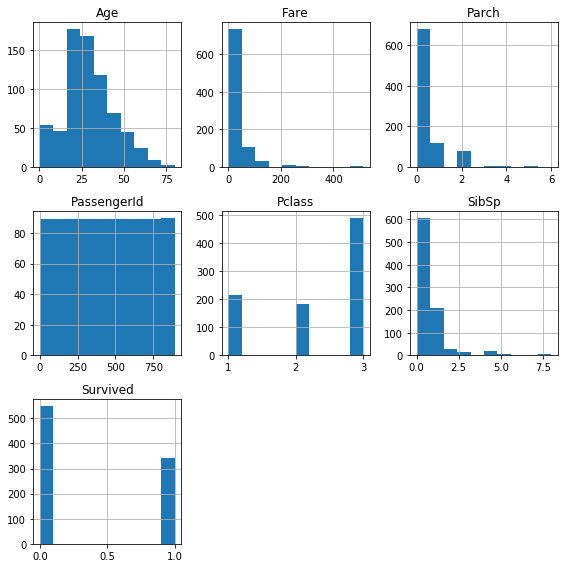

In [40]:
# Histogram for all the variables in df_train
df_train.hist(figsize=(8,8))
plt.tight_layout()
plt.show()

1. Age: majoria a 25 anys, hauriem de veure com omplim els NaNs de l'Age. (pot ser important? hauriem de veure relacio mortalitat en funcio edat)
2. Majoria clara Fare barat, tb seria interessant veure relacio amb superviencia.
3. El parch ja ho haviem vist, majoria es 0 (sense fills/pares)
4. La Pclass mostra majoria a 3a, i poca diferencia entre 1 i 2

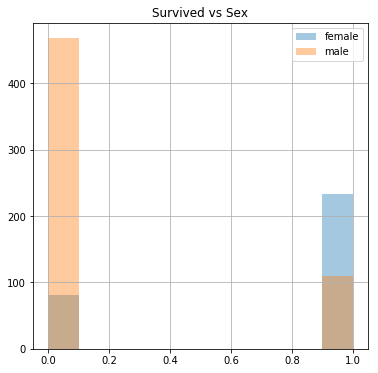

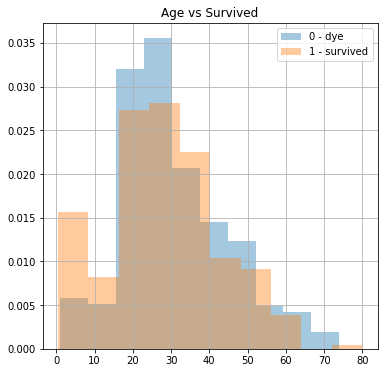

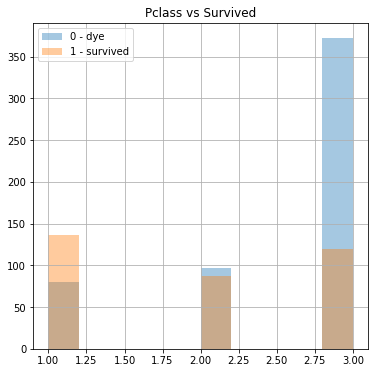

In [41]:
df_train.groupby('Sex').Survived.hist(alpha=0.4,figsize=(6,6))
plt.legend(('female','male'))
plt.title('Survived vs Sex')
plt.show()

df_train.groupby('Survived').Age.hist(alpha=0.4,figsize=(6,6), density=True)
plt.title('Age vs Survived')
plt.legend(('0 - dye','1 - survived'))
plt.show()

df_train.groupby('Survived').Pclass.hist(alpha=0.4,figsize=(6,6),density=False)
plt.legend(('0 - dye','1 - survived'))
plt.title('Pclass vs Survived')
plt.show()

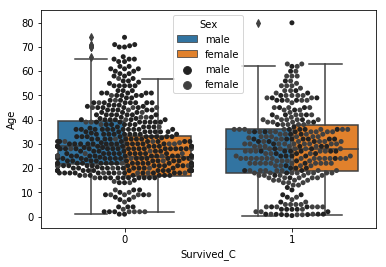

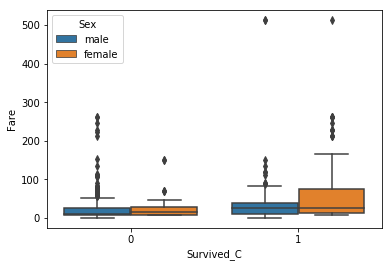

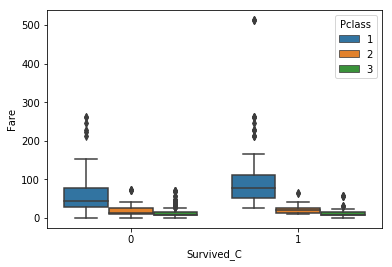

In [42]:
# Create the boxplot for the Age and Fare grouped by survivals (is it important?) and Sex?
sns.boxplot(y=df_train['Age'],x=df_train['Survived_C'],hue=df_train['Sex'])
sns.swarmplot(y=df_train['Age'],x=df_train['Survived_C'],hue=df_train['Sex'], color=".25")
plt.show()


sns.boxplot(y=df_train['Fare'],x=df_train['Survived_C'],hue=df_train['Sex'])
plt.show()

sns.boxplot(y=df_train['Fare'],x=df_train['Survived_C'],hue=df_train['Pclass'])
plt.show()

## Cabin importance
queda veure per exemple la relacio que hi ha entre les cobertes i la taxa de supervivencia (a priori hauria de ser molt important)
1. La Cabin te Nans, potser podriem mirar si existeix relacio entre Cabin i PClass i Fare i reomplim la Cabin

In [43]:
print (df_train.head(2))
print ('Cabin null values: ',df_train['Cabin'].isnull().count())
print ('Cabin NO-null values: ',df_train['Cabin'].count())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked   Sex_C Survived_C Embarked_C  \
0      0  A/5 21171   7.2500   NaN        S    male          0          S   
1      0   PC 17599  71.2833   C85        C  female          1          C   

  Pclass_C  
0        3  
1        1  
Cabin null values:  891
Cabin NO-null values:  204


Veiem que la Cabin te nomes 204 valors not-nulls, la idea es veure si en podem treure alguna relacio amb altres variables per omplir els valors nuls i fer-la servir pel model.
1. fem un nou dataframe on nomes tindrem passatgers amb Cabin amb valor
2. Separem la Cabin en Deck + Room.
    1. La deck ha d'estar relacionada resgur amb Pclass i amb Fare.... podria també estar relacionada amb sexe?
    2. El numero de la room també podria indicar posicio relativa del vaixell (proa, popa, babor, estribor, i aixo podria influir en mortalitat tb..). Potser tenen mateixa distribucio per totes les decks, o potser no

In [44]:
df_train_Cabin= df_train[df_train['Cabin'].notnull()]
print(df_train_Cabin.head())

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked   Sex_C Survived_C Embarked_C  \
1       0  PC 17599  71.2833   C85        C  female          1          C   
3       0    113803  53.1000  C123        S  female          1          S   
6       0     17463  51.8625   E46        S    male          0          S   


In [45]:
df_train_Cabin["Deck"] = df_train_Cabin["Cabin"].str.slice(0,1)
df_train_Cabin["Number"] = df_train_Cabin["Cabin"].str.slice(1,4).str.extract('([0-9]+)').astype('float')    
print(df_train_Cabin.head())

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked   Sex_C Survived_C Embarked_C  \
1       0  PC 17599  71.2833   C85        C  female          1          C   
3       0    113803  53.1000  C123        S  female          1          S   
6       0     17463  51.8625   E46        S    male          0          S   


C:\Users\Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
table10 = pd.pivot_table(df_train_Cabin, index=['Deck','Pclass'],aggfunc=len, values=['Survived'])
table10.columns=['Nº Passengers']

table11 = pd.pivot_table(df_train_Cabin, index=['Deck','Pclass'],aggfunc=np.mean, values=['Age','Fare','Survived'])
table11.columns=['mean Age','mean fare','survival (tant per 1)']

result5 = pd.merge(table10, table11, on=['Deck', 'Pclass'])

print(result5)

             Nº Passengers   mean Age   mean fare  survival (tant per 1)
Deck Pclass                                                             
A    1                  15  44.833333   39.623887               0.466667
B    1                  47  34.955556  113.505764               0.744681
C    1                  59  36.086667  100.151341               0.593220
D    1                  29  40.037037   63.324286               0.758621
     2                   4  32.250000   13.166675               0.750000
E    1                  25  40.083333   55.740168               0.720000
     2                   4  38.833333   11.587500               0.750000
     3                   3  21.666667   11.000000               1.000000
F    2                   8  16.687500   23.750000               0.875000
     3                   5  28.666667   10.611660               0.200000
G    3                   4  14.750000   13.581250               0.500000
T    1                   1  45.000000   35.500000  

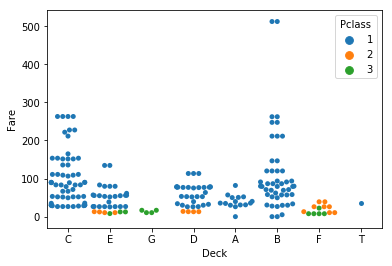

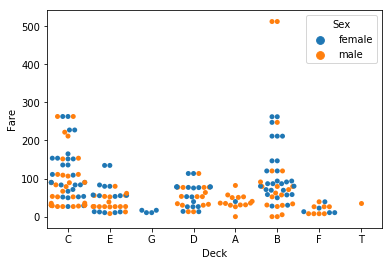

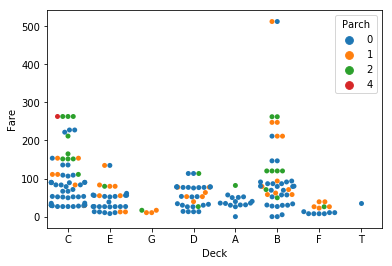

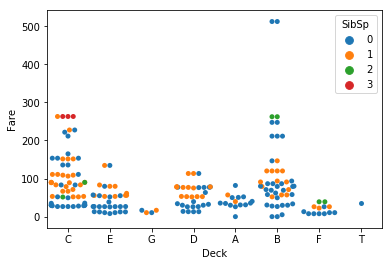

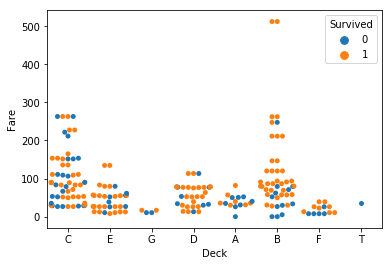

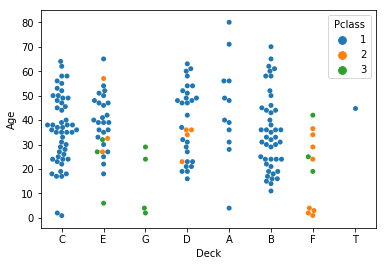

In [47]:
sns.swarmplot(x=df_train_Cabin['Deck'],y=df_train_Cabin['Fare'],hue=df_train_Cabin['Pclass'])
plt.show()

sns.swarmplot(x=df_train_Cabin['Deck'],y=df_train_Cabin['Fare'],hue=df_train_Cabin['Sex'])
plt.show()

sns.swarmplot(x=df_train_Cabin['Deck'],y=df_train_Cabin['Fare'],hue=df_train_Cabin['Parch'])
plt.show()

sns.swarmplot(x=df_train_Cabin['Deck'],y=df_train_Cabin['Fare'],hue=df_train_Cabin['SibSp'])
plt.show()

sns.swarmplot(x=df_train_Cabin['Deck'],y=df_train_Cabin['Fare'],hue=df_train_Cabin['Survived'])
plt.show()

sns.swarmplot(x=df_train_Cabin['Deck'],y=df_train_Cabin['Age'],hue=df_train_Cabin['Pclass'])
plt.show()

In [48]:
cor=df_train_Cabin.corr()
print(cor)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.110153 -0.082977  0.042758 -0.079741 -0.063456   
Survived        0.110153  1.000000 -0.033032 -0.244604  0.132599  0.038081   
Pclass         -0.082977 -0.033032  1.000000 -0.307590 -0.084097  0.058366   
Age             0.042758 -0.244604 -0.307590  1.000000 -0.161625 -0.274813   
SibSp          -0.079741  0.132599 -0.084097 -0.161625  1.000000  0.265411   
Parch          -0.063456  0.038081  0.058366 -0.274813  0.265411  1.000000   
Fare            0.017243  0.128306 -0.311713 -0.091542  0.290696  0.383972   
Number          0.043803 -0.031499 -0.159375  0.080628 -0.052326 -0.106863   

                 Fare    Number  
PassengerId  0.017243  0.043803  
Survived     0.128306 -0.031499  
Pclass      -0.311713 -0.159375  
Age         -0.091542  0.080628  
SibSp        0.290696 -0.052326  
Parch        0.383972 -0.106863  
Fare         1.000000  0.083041  
Number       0.083041  1.

### Resum part Cabins (moltes coses)
tinc la impresio (i ademés he vist en alguna web coses per l'estil) que si fem fer la part de las Deck podem trobar una bona forma de donar "labels" bons pel model.
Passos a seguir:
1. Hauriem de juntar el dataframe df_train_Cabin amb el df_train, de forma que tinguem tb els pasastgers sense info de la Cabina
2. Re-omplir els missing values de les cabines. Aqui hi han dues opcions:
    1. A Sac. Posar un valor o lletra que ens definxeixi la Cabina sense nom --> per exemple, posar X a totes amb NaN. Aquest mètode he vist que algu l'havia fet servir, i al final aconsegui un score relativmant bo (al voltant de 0.7)
    2. Intentar clavar una mica més la info, pero es molt dificil, com podriem decicir quin Desk es en funcio de la PClass?
        1. Podria ser que la G sigui Pclass 3, i nomes per dones? (a la F, tenim nomes una dona de la Pclass 3...)
        2. algun amb fare de mes de 400 a la B? Classe 1
    3. intentar veure si els fares es corresponen amb els cabins? (de forma exacta). Es a dir, es repeteix algun fare? ocupa la mateixa cabin?

In [51]:
# Ara podem aplicar el slice al df_train original i reomplir els NaNs del Deck amb X
df_train["Deck"] = df_train["Cabin"].str.slice(0,1)
df_train["Number"] = df_train["Cabin"].str.slice(1,4).str.extract('([0-9]+)').astype('float')
df_train['Deck'][df_train['Deck'].isnull()]='X'
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked   Sex_C Survived_C  \
0      0         A/5 21171   7.2500   NaN        S    male          0   
1      0          PC 17599  71.2833   C85        C  female          1   
2      0  STON/O2. 3101282   7.9250   NaN        S  female          1   
3      0            113803  

C:\Users\Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


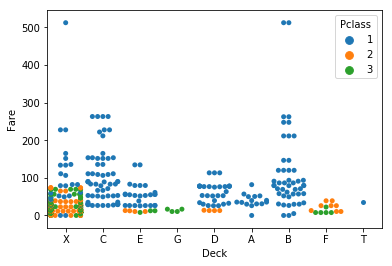

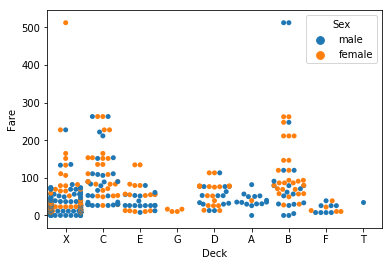

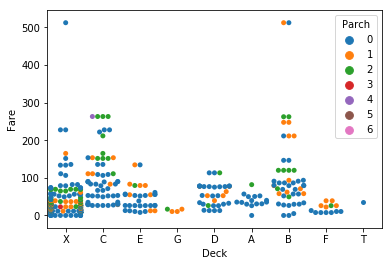

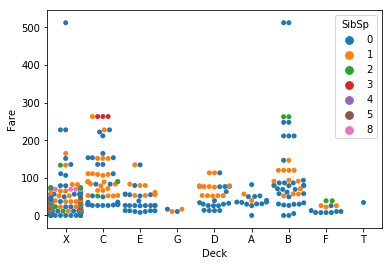

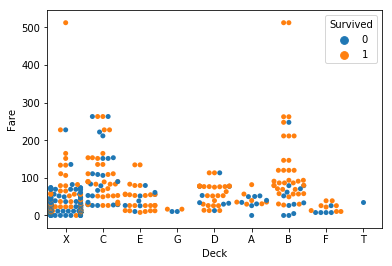

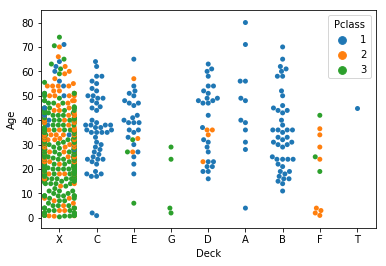

In [52]:
sns.swarmplot(x=df_train['Deck'],y=df_train['Fare'],hue=df_train['Pclass'])
plt.show()

sns.swarmplot(x=df_train['Deck'],y=df_train['Fare'],hue=df_train['Sex'])
plt.show()

sns.swarmplot(x=df_train['Deck'],y=df_train['Fare'],hue=df_train['Parch'])
plt.show()

sns.swarmplot(x=df_train['Deck'],y=df_train['Fare'],hue=df_train['SibSp'])
plt.show()

sns.swarmplot(x=df_train['Deck'],y=df_train['Fare'],hue=df_train['Survived'])
plt.show()

sns.swarmplot(x=df_train['Deck'],y=df_train['Age'],hue=df_train['Pclass'])
plt.show()